<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
    <img style="float: right; padding-right: 10px; width: 65px" src="https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/clemson_paw.png"> </div>


## Homework: EDA and Visualization

**Clemson University**<br>
**Fall 2021**<br>
**Instructor(s):** Nina Hubig <br>
**Author(s):** Brandon Walker


---



In [1]:
""" RUN THIS CELL TO GET THE RIGHT FORMATTING """
import requests
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/css/cpsc6300.css'
styles = requests.get(css_file).text
HTML(styles)

In [2]:
import pandas as pd 
import numpy as np
from pandas.plotting import scatter_matrix 

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
%matplotlib inline 

## INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

## Load Data

Using Pandas, load the `College.csv` file into a DataFrame named `college`. Take a look at the data loaded. You will notice that the first column is named 'Unnamed: 0' and contains the name of each university. Rename the first column as `Name` and show the first few rows of the DataFrame.

This exercise relates to the College data set, which can be found in the file [College.csv](http://faculty.marshall.usc.edu/gareth-james/ISL/College.csv). It contains a number of variables for 777 different universities and colleges in the US. The variables are

- Private: Public/private indicator
- Apps: Number of applications received
- Accept: Number of applicants accepted
- Enroll: Number of new students enrolled
- Top 10 percent: New students from top10% of high school class
- Top 25 percent: New students from top 25% of high school class
- F.Undergrad: Number of full-time. undergraduates
- P.Undergrad: Number of part-time undergraduates
- Outstate: Out-of-state tuition
- Room.Board: Room and board costs
- Books: Estimated book costs
- Personal: Estimated personal spending
- PhD: Percent of faculty with Ph.D.’s
- Terminal: Percent of faculty with terminal degree • S.F.Ratio: Student/faculty ratio
- perc alumni: Percent of alumni who donate
- expend: Instructional expenditure per student
- grad.Rate: Graduation rate

In [3]:
# %load solutions/load_data.py
# Your code here
df = pd.read_csv("data/College.csv")
df.rename(columns={"Unnamed: 0": "Name"}, inplace=True)
df.head()

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Questions

Now that you are familiar with the College dataset, answer the following questions. 

<div class='exercise'> <b> Question 1 - Elite Institutions: </b> Create a new qualitative variable, called Elite, by binning the Top 10 percent variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.</div>

In [4]:
# %load solutions/question01.py
# Your code here
df["Elite"] = df["Top10perc"] > 50
df.head()

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,False
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,False
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,False
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,True
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,False


<div class='exercise'> <b> Question 2 - Acceptance Rates: </b> Create a new column called AcceptRate with contains the acceptance rate for each university.</div>

In [5]:
# %load solutions/question02.py
# Your code here
df["AcceptRate"] = (df["Accept"] / df["Apps"]) * 100
df.AcceptRate = df.AcceptRate.astype(int)
df.head()

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite,AcceptRate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,450,2200,70,78,18.1,12,7041,60,False,74
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,750,1500,29,30,12.2,16,10527,56,False,88
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,400,1165,53,66,12.9,30,8735,54,False,76
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,450,875,92,97,7.7,37,19016,59,True,83
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,800,1500,76,72,11.9,2,10922,15,False,75


<div class='exercise'> <b> Question 3:</b> How many elite schools are there?</div>

In [6]:
# %load solutions/question03.py
# Your code here
print(f"There are {df['Elite'].sum()} elite schools")

There are 78 elite schools


<div class='exercise'> <b> Question 4 - Acceptance Rate Comparison</b> Create a boxplot comparing the acceptance rates of elite and non-elite universities. Make sure your plot has the appropriate labels and a title.</div>

Text(0.5, 1.0, 'Elite vs Non Elite University Acceptance Rates')

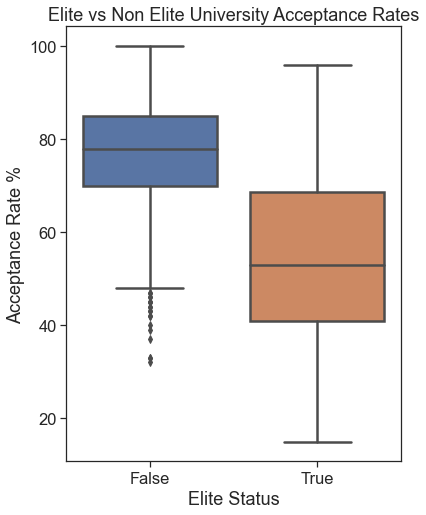

In [7]:
# %load solutions/question04.py
# Your code here
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(6, 8))
ax = sns.boxplot(x='Elite', y='AcceptRate', data=df)
ax.set_xlabel('Elite Status')
ax.set_ylabel('Acceptance Rate %')
ax.set_title('Elite vs Non Elite University Acceptance Rates')

<div class='exercise'> <b> Question 5 - Cost Comparisons:</b> Create two side-by-side histograms (using subplots) showing the distribution of out of state tuition for elite and non-elite institutions. Make sure each plot is labeled appropriately.</div>

Text(0.5, 0, 'Tuition Amount ($)')

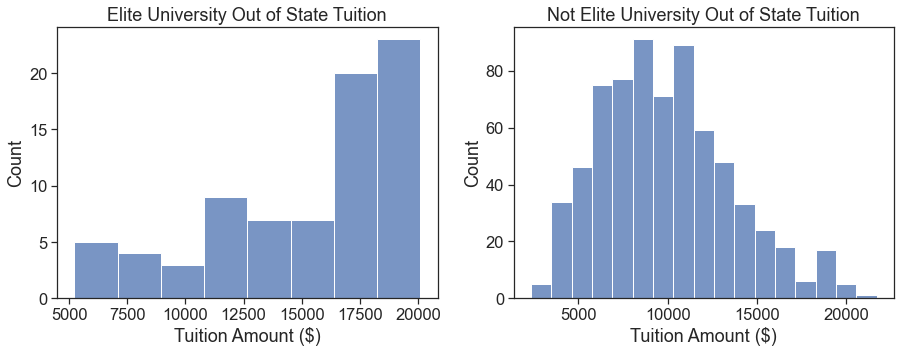

In [8]:
# %load solutions/question05.py
# Your code here
fig, ax = plt.subplots(1, 2, figsize=(15,5))
elite_df = df[(df["Elite"])]
notelite_df = df[~(df["Elite"])]
sns.histplot(data=elite_df, x="Outstate", ax=ax[0])
ax[0].set_title("Elite University Out of State Tuition")
ax[0].set_xlabel("Tuition Amount ($)")
sns.histplot(data=notelite_df, x="Outstate", ax=ax[1])
ax[1].set_title("Not Elite University Out of State Tuition")
ax[1].set_xlabel("Tuition Amount ($)")

<div class='exercise'> <b> Question 6:</b> What is the university with the most students in the top 10% of class?</div>

In [9]:
# %load solutions/question06.py
# Your code here
topSchool = df.iloc[df['Top10perc'].idxmax()]
print(f"{topSchool.Name} has the most students in the top 10% of their class at {topSchool.Top10perc}%")

Massachusetts Institute of Technology has the most students in the top 10% of their class at 96%


<div class='exercise'> <b> Question 7:</b> What university has the smallest acceptance rate?</div>

In [10]:
# %load solutions/question07.py
# Your code here
lowAcceptSchool = df.iloc[df['AcceptRate'].idxmin()]
print(f"{lowAcceptSchool.Name} has the lowest acceptance rate at {lowAcceptSchool.AcceptRate}%")

Harvard University has the lowest acceptance rate at 15%


<div class='exercise'> <b> Question 8:</b> What university has the most liberal acceptance rate?</div>

In [11]:
# %load solutions/question08.py
# Your code here
highAcceptSchool = df.iloc[df['AcceptRate'].idxmax()]
print(f"{highAcceptSchool.Name} has the highest acceptance rate at {highAcceptSchool.AcceptRate}%")

Emporia State University has the highest acceptance rate at 100%


<div class='exercise'> <b> Question 9:</b> What is the correlation between out-of-state tuition and graduation rate?</div>

In [12]:
# %load solutions/question09.py
# Your code here
tuitionGraduationCorr = df['Outstate'].corr(df['Grad.Rate'])
print(f"The correlation between out-of-state tuition and graduation rate is {tuitionGraduationCorr}")

The correlation between out-of-state tuition and graduation rate is 0.5712899282482011


<div class='exercise'> <b> Question 10:</b> Based on the data provided, what is Clemson's acceptance rate?</div>

In [13]:
# %load solutions/question10.py
# Your code here
clemsonData = df[df['Name'] == 'Clemson University'].squeeze()
print(f"Clemson's acceptance rate is {clemsonData.AcceptRate}%")

Clemson's acceptance rate is 65%
